In [1]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Dense, Flatten, Conv2D, Dropout, GlobalMaxPooling2D
from keras.models import Model

In [3]:
cifar10 = tf.keras.datasets.cifar10
(x_train,y_train),(x_test,y_test) = cifar10.load_data()
x_train,x_test  =  x_train/255.0,x_test/255.0
y_train, y_test= y_train.flatten(), y_test.flatten()
print(x_train.shape)
print(y_train.shape)

170498071/170498071 [==============================] - 2s 0us/step
(50000, 32, 32, 3)
(50000,)


In [4]:
K = len(set(y_train))
print(f"There are {K} classes")

There are 10 classes


In [5]:
i = Input(shape = x_train[0].shape)
x = Conv2D(32, (3,3), strides = 2, activation = 'relu')(i)
x = Conv2D(64, (3,3), strides = 2, activation = 'relu')(x)
x = Conv2D(128, (3,3), strides = 2, activation = 'relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024,activation = 'relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation = 'softmax')(x)

model = Model(i,x)

In [6]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
              )
r = model.fit(x_train, y_train, validation_data = (x_test,y_test), epochs = 15)

Epoch 1/15
1563/1563 [==============================] - 16s 5ms/step - loss: 1.5041 - accuracy: 0.4513 - val_loss: 1.2369 - val_accuracy: 0.5520
Epoch 2/15
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1635 - accuracy: 0.5853 - val_loss: 1.0605 - val_accuracy: 0.6181
Epoch 3/15
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9992 - accuracy: 0.6427 - val_loss: 0.9837 - val_accuracy: 0.6454
Epoch 4/15
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8804 - accuracy: 0.6868 - val_loss: 0.9680 - val_accuracy: 0.6646
Epoch 5/15
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7843 - accuracy: 0.7224 - val_loss: 0.8899 - val_accuracy: 0.6891
Epoch 6/15
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6884 - accuracy: 0.7556 - val_loss: 0.8843 - val_accuracy: 0.6901
Epoch 7/15
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5972 - accuracy: 0.7872 - val_loss: 0.9101 - val_accuracy

In [6]:
plt.plot(r.history['loss'], label = "Loss")
plt.plot(r.history['val_loss'], label = " Val Loss")
plt.legend()

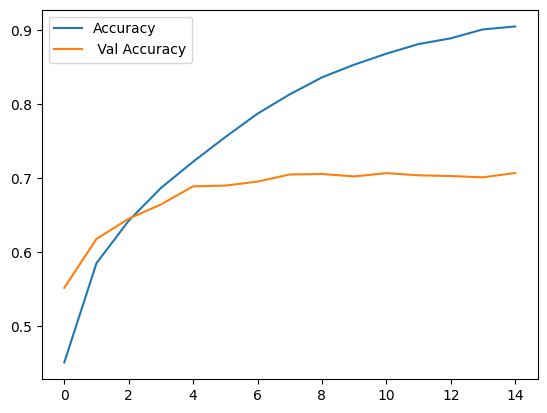

In [7]:
plt.plot(r.history['accuracy'], label = "Accuracy")
plt.plot(r.history['val_accuracy'], label = " Val Accuracy")
plt.legend()

313/313 [==============================] - 2s 4ms/step
Didnt normalize confusion matrix
[[782  18  42   3  22   7  11  12  54  49]
 [ 14 806   6   4   2   3  10   4  24 127]
 [ 57   6 619  37  78  64  70  38  19  12]
 [ 27  11  94 437  54 182  95  48  20  32]
 [ 21   3 104  49 614  53  64  77   8   7]
 [ 16   6  48 150  42 604  48  54   8  24]
 [  8   6  29  45  35  16 832  12   8   9]
 [ 13   2  30  28  50  57  10 778   3  29]
 [ 93  35  12  12   7   6   9   8 795  23]
 [ 39  78   7  12   4   4  12  17  23 804]]


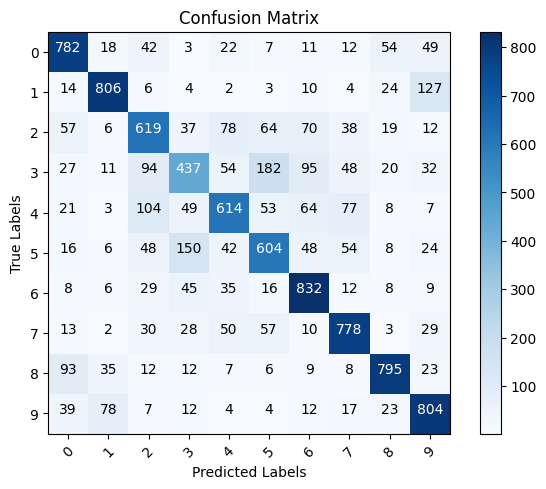

In [8]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_cf_matrix(cm, classes,normalize = False, title = "Confusion Matrix", cmap = plt.cm.Blues):
  if normalize:
    cm = cm.astype('float') / cm.sum(axis = 1)[:,np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Didnt normalize confusion matrix")

  print(cm)
  plt.imshow(cm,interpolation = 'nearest',cmap = cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation = 45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2


  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i,format(cm[i,j],fmt,),horizontalalignment = 'center',
    color = 'white' if cm[i,j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel("True Labels")
  plt.xlabel("Predicted Labels")
  plt.show()

p_test = model.predict(x_test).argmax(axis =1)
cm = confusion_matrix(y_test, p_test)
plot_cf_matrix(cm, list(range(10)))

In [9]:
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck
'''.split()

True: bird, Prediction deer


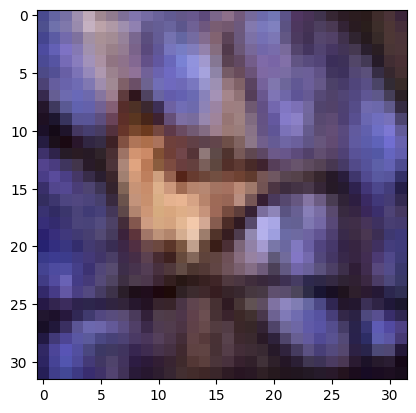

In [13]:
misclassified_index = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_index)
plt.imshow(x_test[i],cmap = 'gray')
print(f"True: {labels[y_test[i]]}, Prediction {labels[p_test[i]]}")